# Compare simulations
### Try with both delta SWE and by using the mass balance components

In [1]:
import xarray as xr

In [2]:
path1 = "/scratch/summit/erke2265/a3d_grids.nc"
path2 = "../output/grids/a3d_grids.nc"

In [3]:
ds1 = xr.open_dataset(path1)
ds2 = xr.open_dataset(path2)

In [20]:
end_ind = len(ds2['time']) - 1
print("Timesteps used in comparison = " + str(end_ind + 1))

# dswe1 = ds1['swe'].isel(time=end_ind) - ds1['swe'].isel(time=0); dswe1 = dswe1*1000
# dswe2 = ds2['swe'].isel(time=end_ind) - ds2['swe'].isel(time=0); dswe2 = dswe2*1000

dswe1 = ds1['pr'][0:end_ind+1,:,:].sum(dim='time')/1 + ds1['ET'][0:end_ind+1,:,:].sum(dim='time')/1 + \
    ds1['WINDEROSIONDEPOSITION'][0:end_ind+1,:,:].sum(dim='time')/1 + ds1['MS_SNOWPACK_RUNOFF'][0:end_ind+1,:,:].sum(dim='time')/1
dswe2 = ds2['pr'].sum(dim='time')/1 + ds2['ET'].sum(dim='time')/1 + \
    ds2['WINDEROSIONDEPOSITION'].sum(dim='time')/1 + ds2['MS_SNOWPACK_RUNOFF'].sum(dim='time')/1

ratio = dswe2 / dswe1

Timesteps used in comparison = 25


0.8859179


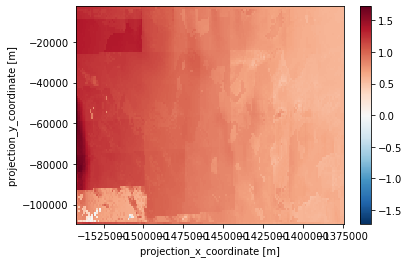

In [21]:
dswe1.plot()
print(dswe1.mean(dim='easting').mean(dim='northing').values)

0.8851066


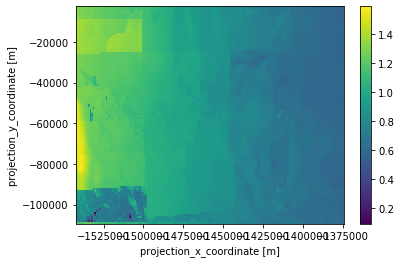

In [22]:
dswe2.plot()
print(dswe2.mean(dim='easting').mean(dim='northing').values)

0.9010076


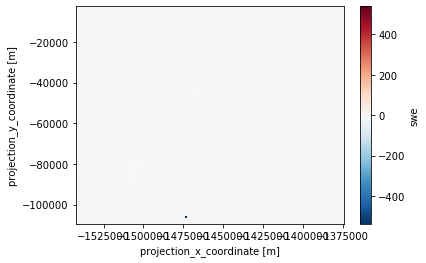

In [19]:
ratio.plot()
print(ratio.mean(dim='easting').mean(dim='northing').values)